In [73]:
%matplotlib inline
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

a = cv2.imread("../../ab.png")
h, w = a.shape[:2]
gt = a[:,:w//2]
pd = a[:, w//2:]


# pd_blurred = cv2.bilateralFilter(pd,2,95,95)
# pd_blurred = cv2.medianBlur(pd,3)
pd_blurred = cv2.GaussianBlur(pd,(5,5), 0)
gt_blurred = cv2.GaussianBlur(gt,(3,3), 0)
mseo = ((gt/255. - pd/255.)**2).mean()
mse = ((gt/255. - pd_blurred/255.)**2).mean()
msegtb = ((gt_blurred/255. - pd_blurred/255.)**2).mean()
psnro = 20*np.log10(1/np.sqrt(mseo))
psnr = 20*np.log10(1/np.sqrt(mse))
psnrgtb = 20*np.log10(1/np.sqrt(msegtb))
print(mse, psnro, psnr, psnrgtb)

0.0013624823481349026 29.1315805193674 28.656691155887636 30.614622261450645


/tmp/ipykernel_697504/913283045.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  psnr = 20*np.log10(1/np.sqrt(mse))


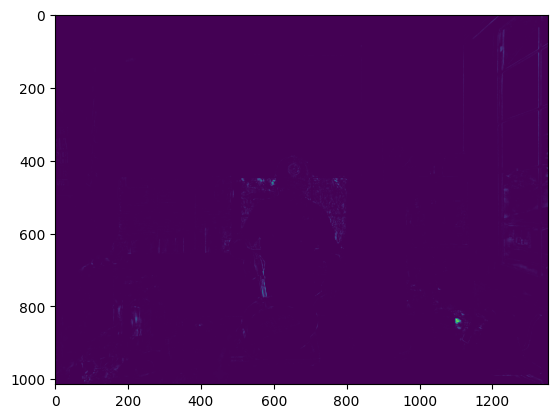

In [57]:
import numpy as np
mse = ((gt/255. - gt/255.)**2).mean()
psnr = 20*np.log10(1/np.sqrt(mse))
mse_map = ((gt/255. - pd/255.)**2).mean(axis=-1)
plt.imshow(mse_map)